In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
%matplotlib inline

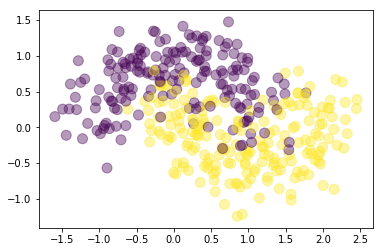

In [2]:
X, Y = make_moons(n_samples=500, noise=0.3)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=100, alpha=0.4)

In [3]:
C = 1.0
kernel_svc = svm.SVC(C=C, kernel='poly', degree=3)
kernel_svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

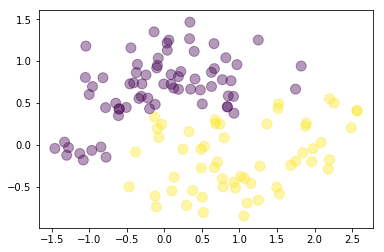

In [4]:
Y_predict = kernel_svc.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_predict, s=100, alpha=0.4)

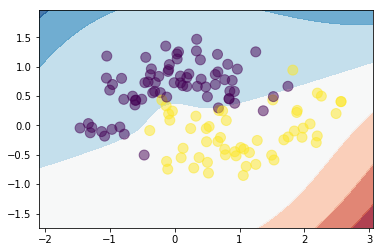

In [5]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = kernel_svc.decision_function(np.c_[xx.ravel(), yy.ravel()]) # distancia al plano separador
Z = Z.reshape(xx.shape)

cm = plt.cm.RdBu
plt.contourf(xx, yy, -Z, cmap=cm, alpha=.8) # el signo menos viene por razones puramente esteticas del plot.

plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=100, alpha=0.5)

In [6]:
n_bad = 1.0 * len(Y_predict[Y_predict != Y_test])
n_total = 1.0 * len(Y_predict)
eff = n_bad / n_total
print(eff)

0.048


In [7]:
C = 1.0
gamma = 1.0
kernel_svc = svm.SVC(C=C, kernel='rbf', gamma=gamma)
kernel_svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

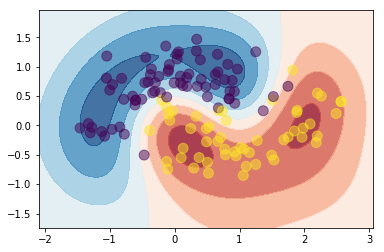

In [8]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = kernel_svc.decision_function(np.c_[xx.ravel(), yy.ravel()]) # distancia al plano separador
Z = Z.reshape(xx.shape)

cm = plt.cm.RdBu
plt.contourf(xx, yy, -Z, cmap=cm, alpha=.8) # el signo menos viene por razones puramente esteticas del plot.

plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=100, alpha=0.5)

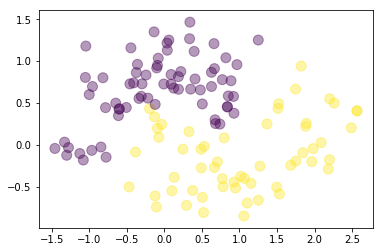

In [9]:
Y_predict = kernel_svc.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_predict, s=100, alpha=0.4)

In [10]:
n_bad = 1.0 * len(Y_predict[Y_predict != Y_test])
n_total = 1.0 * len(Y_predict)
eff = n_bad / n_total
print(eff)

0.048


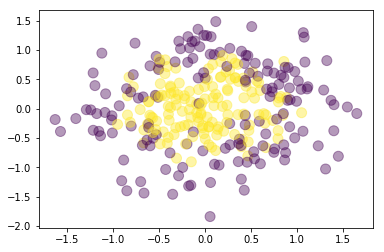

In [11]:
X, Y = make_circles(n_samples=500, noise=0.3, factor=0.4)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4)

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=100, alpha=0.4)

In [12]:
C = 1.0
gamma = 1.0
kernel_svc = svm.SVC(C=C, kernel='rbf', gamma=gamma)
kernel_svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

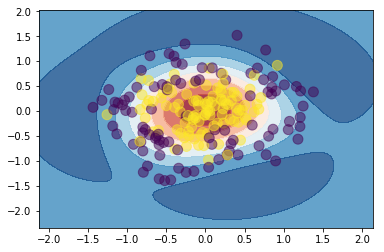

In [13]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = kernel_svc.decision_function(np.c_[xx.ravel(), yy.ravel()]) # distancia al plano separador
Z = Z.reshape(xx.shape)

cm = plt.cm.RdBu
plt.contourf(xx, yy, -Z, cmap=cm, alpha=.8) # el signo menos viene por razones puramente esteticas del plot.

plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=100, alpha=0.5)

In [22]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV

gamma_range = np.logspace(-2, 2, 20)
print(gamma_range)
param_grid = dict(gamma=gamma_range)

cv = ShuffleSplit(n_splits=10, test_size=0.20)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)

grid.fit(X,Y)

print("The best gamma={}, score={}".format(grid.best_params_, grid.best_score_))

[  1.00000000e-02   1.62377674e-02   2.63665090e-02   4.28133240e-02
   6.95192796e-02   1.12883789e-01   1.83298071e-01   2.97635144e-01
   4.83293024e-01   7.84759970e-01   1.27427499e+00   2.06913808e+00
   3.35981829e+00   5.45559478e+00   8.85866790e+00   1.43844989e+01
   2.33572147e+01   3.79269019e+01   6.15848211e+01   1.00000000e+02]
The best gamma={'gamma': 0.78475997035146106}, score=0.806


### Ejercicio

Graficar la eficiencia del SVM clasificador como funcion de C (variandolo en escala logaritmica) y gamma (variandolo en escala logaritmica) para un conjunto de datos similares al utilizado en este notebook (lunas, y circulos).